**Name:**
**Roll No:**  
**PRN:**  
**Experiment Title:** Experiment 8 – Explainable AI    
**Branch:** Cyber Security

In [25]:
# Install required libraries
!pip install shap pandas scikit-learn matplotlib seaborn

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Download healthcare dataset from Kaggle
from google.colab import files
files.upload()   # Upload kaggle.json API key manually

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the Diabetes dataset
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [28]:
# Load and explore dataset
df = pd.read_csv("diabetes.csv")
df.head()

# Display structure, summary, and check for null values
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [29]:
# Define features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict outcomes
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



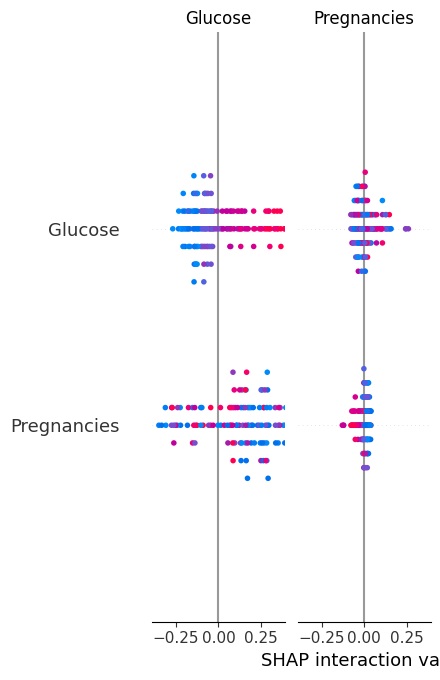

In [31]:
# Apply SHAP for Explainable AI
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot shows how all features influence the model globally
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test)

In [32]:
# Force plot (individual sample explanation)
sample = X_test.iloc[0, :]  # Select one test instance
shap.initjs()  # Initialize JS visualization
shap_value_positive = shap_values[:, :, 1]
shap.plots.force(explainer.expected_value[1], shap_value_positive[0, :], sample)

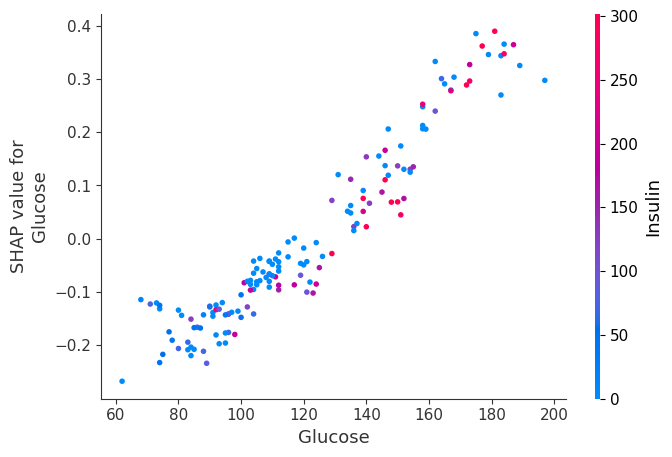

In [33]:
# Dependence plot for Glucose feature
shap_values_pos = shap_values[:, :, 1]
shap.dependence_plot("Glucose", shap_values_pos, X_test)

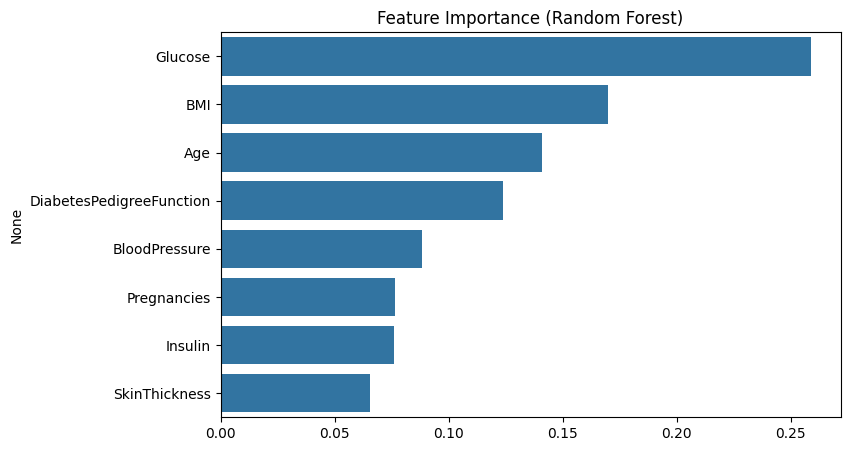

In [40]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

"""
Model achieved good accuracy.
SHAP plots show Glucose, BMI, and Age are key predictors.
Explainable AI helped understand which features drive predictions.
Improves trust and interpretability for clinical use.
""";